In [1]:
import torch
import numpy as np
from conut import MechanicalGraphene, Mode
from conut.data import WaveNumber
from conut.plot import Plot


dev = 'cuda' if torch.cuda.is_available() else 'cpu'
κ = 55/120 * 10 * 2
α = 35 / 60
m = (0.01**2 * np.pi * 0.045 - 0.002 **2 * np.pi * 0.045) * 0.00873 * 1000000
l = 1.
mg = MechanicalGraphene(κ=κ, α=α, m=m, l=l, mode=Mode.Bulk, Ω=0., precision=1e-1, perturbation=False).to(dev)






tensor([[1.7321+0.j],
        [0.0000+0.j]], dtype=torch.complex128)


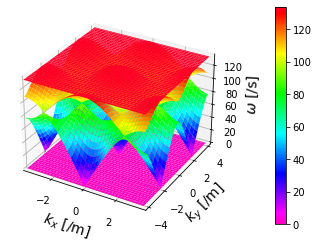

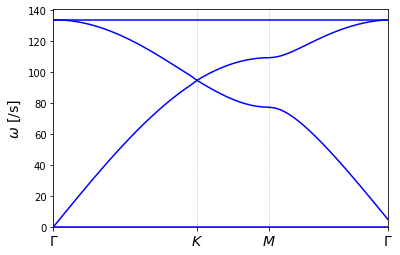

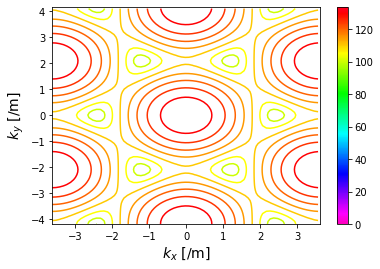

In [2]:
%matplotlib inline
plt = Plot(mg)
plt.dispersion3d(bands=[4, 5, 6, 7], save=False)
plt.dispersion(bands=[4, 5, 6, 7], save=False)
plt.band(n=6, save=False)
# plt.realspace(save=False)